<a href="https://colab.research.google.com/github/armandordorica/velocity_limits/blob/main/Velocity_limits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
{"id":"15887","customer_id":"528","load_amount":"$3318.47","time":"2000-01-01T00:00:00Z"}
{"id":"30081","customer_id":"154","load_amount":"$1413.18","time":"2000-01-01T01:01:22Z"}
"""

'\n{"id":"15887","customer_id":"528","load_amount":"$3318.47","time":"2000-01-01T00:00:00Z"}\n{"id":"30081","customer_id":"154","load_amount":"$1413.18","time":"2000-01-01T01:01:22Z"}\n'

In [1]:
!git clone https://github.com/armandordorica/velocity_limits.git

Cloning into 'velocity_limits'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In finance, it's common for accounts to have so-called "velocity limits". In this task, you'll write a program that accepts or declines attempts to load funds into customers' accounts in real-time.

Each attempt to load funds will come as a single-line JSON payload, structured as follows:

```json
{ "id": "1234", "customer_id": "1234", "load_amount": "$123.45", "time": "2018-01-01T00:00:00Z" }
```

Each customer is subject to three limits:

- A maximum of $\$5,000$ can be loaded per day
- A maximum of $\$20,000$ can be loaded per week
- A maximum of 3 loads can be performed per day, regardless of amount

As such, a user attempting to load $\$3,000$ twice in one day would be declined on the second attempt, as would a user attempting to load $400 four times in a day.

For each load attempt, you should return a JSON response indicating whether the fund load was accepted based on the user's activity, with the structure:

```json
{ "id": "1234", "customer_id": "1234", "accepted": true }
```

You can assume that the input arrives in ascending chronological order and that if a load ID is observed more than once for a particular user, all but the first instance can be ignored. Each day is considered to end at midnight UTC, and weeks start on Monday (i.e. one second after 23:59:59 on Sunday).

Your program should process lines from `input.txt` and return output in the format specified above, either to standard output or a file. Expected output given our input data can be found in `output.txt`.

You're welcome to write your program in a general-purpose language of your choosing.

We value well-structured, self-documenting code with sensible test coverage. Descriptive function and variable names are appreciated, as is isolating your business logic from the rest of your code.


In [42]:
ls

AccountsController.py  output_accounts.py  output.txt    README.md
input.txt              output_amar.txt     __pycache__/


In [43]:
cd velocity_limits/

[Errno 2] No such file or directory: 'velocity_limits/'
/content/velocity_limits/takehome


In [44]:
ls

AccountsController.py  output_accounts.py  output.txt    README.md
input.txt              output_amar.txt     __pycache__/


In [45]:
cd takehome/

[Errno 2] No such file or directory: 'takehome/'
/content/velocity_limits/takehome


In [6]:
ls

AccountsController.py  output_accounts.py  output.txt    README.md
input.txt              output_amar.txt     __pycache__/


In [94]:
input_data = pd.read_json('input.txt', lines=True)
input_data.head(), len(input_data)

(      id  customer_id load_amount                  time
 0  15887          528    $3318.47  2000-01-01T00:00:00Z
 1  30081          154    $1413.18  2000-01-01T01:01:22Z
 2  26540          426     $404.56  2000-01-01T02:02:44Z
 3  10694            1     $785.11  2000-01-01T03:04:06Z
 4  15089          205    $2247.28  2000-01-01T04:05:28Z, 1000)

In [95]:
output_data = pd.read_json("output.txt", lines=True)
output_data.head(), len(output_data)

(      id  customer_id  accepted
 0  15887          528      True
 1  30081          154      True
 2  26540          426      True
 3  10694            1      True
 4  15089          205      True, 999)

In [112]:
output_amar_data = pd.read_json("output_amar.txt", lines=True)
output_amar_data.head(), len(output_amar_data)

(   accepted  customer_id     id
 0      True          528  15887
 1      True          154  30081
 2      True          426  26540
 3      True            1  10694
 4      True          205  15089, 999)

In [99]:
common_df= pd.merge(input_data, output_data, how='inner' ,left_on=['id', 'customer_id'], right_on=['id', 'customer_id'])

In [100]:
common_df.head()

,id,customer_id,load_amount,time,accepted
0,15887,528,$3318.47,2000-01-01T00:00:00Z,True
1,30081,154,$1413.18,2000-01-01T01:01:22Z,True
2,26540,426,$404.56,2000-01-01T02:02:44Z,True
3,10694,1,$785.11,2000-01-01T03:04:06Z,True
4,15089,205,$2247.28,2000-01-01T04:05:28Z,True


In [106]:
id_counts = common_df.groupby(['id']).count()

In [108]:
id_counts[id_counts['customer_id']>1]

,customer_id,load_amount,time,accepted
id,,,,
1827,2,2,2,2
5330,2,2,2,2
5472,2,2,2,2
6591,2,2,2,2
6928,2,2,2,2
7185,2,2,2,2
7518,2,2,2,2
10041,2,2,2,2
13812,2,2,2,2


In [111]:
common_df[common_df['id']==1827]

,id,customer_id,load_amount,time,accepted
345,1827,698,$971.86,2000-01-15T15:50:08Z,True
701,1827,766,$4522.88,2000-01-30T20:58:02Z,False


In [115]:
output_amar_data[output_amar_data['id']==1827]

,accepted,customer_id,id
344,True,698,1827
700,False,766,1827


Text(0, 0.5, 'Load Amount')

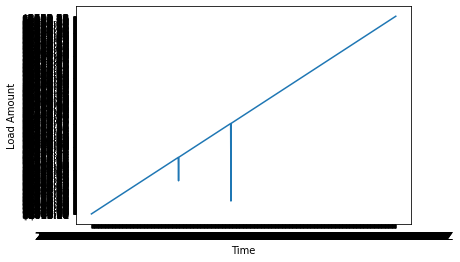

In [124]:
import matplotlib.pyplot as plt
plt.plot(input_data['time'], input_data['load_amount'])
plt.xlabel("Time")
plt.ylabel("Load Amount")

There are 984 unique load ids, 50 unique customer_ids. 


In [128]:
num_unique_ids = len(input_data['id'].unique())
num_unique_customer_ids = len(input_data['customer_id'].unique())
num_unique_ids, num_unique_customer_ids 

(984, 50)

(array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.]),
 array([  0. ,  99.9, 199.8, 299.7, 399.6, 499.5, 599.4, 699.3, 799.2,
        899.1, 999. ]),
 <a list of 10 Patch objects>)

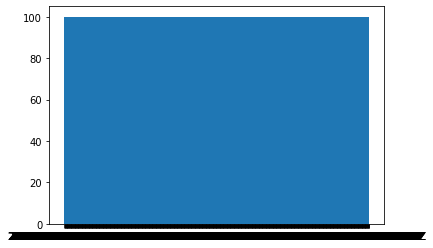

In [136]:
plt.hist(input_data['time'])

In [30]:
from AccountsController import AccountsController

In [31]:
acct_ctrl1 = AccountsController()

In [36]:
acct_ctrl1.daily_deposit_limit, acct_ctrl1.weekly_deposit_limit, acct_ctrl1.daily_loads

(5000, 20000, 3)

### As such, a user attempting to load $3,000 twice in one day would be declined on the second attempt

In [40]:
acct_ctrl1.processUserLoad(input_data_list[0])

{'accepted': True, 'customer_id': '528', 'id': '15887'}

In [41]:
acct_ctrl1.processUserLoad(input_data_list[0])

{'accepted': False, 'customer_id': '528', 'id': '15887'}

In [46]:
acct_ctrl1

 ### A user attempting to load $400 four times in a day should be declined 

In [47]:
acct_ctrl2 = AccountsController()

In [50]:
# input_data_list

In [51]:
loads = {'customer_id': '154',
  'id': '404',
  'load_amount': '$400.00',
  'time': '2000-01-22T20:41:06Z'}

acct_ctrl2.processUserLoad(load)

{'accepted': True, 'customer_id': '154', 'id': '404'}

In [56]:
input_file = open('input.txt', 'r')
json_lines = input_file.readlines()

In [61]:
# json_lines

In [62]:
import json

load_id_json = {}

accounts_controller= AccountsController()

#Create a write to file output_amar.txt
with open('output_amar2.txt', 'w') as outfile:
    for line in json_lines:
        customer_json = json.loads(line)
        customer_id = customer_json['customer_id']
        load_id = customer_json['id']
        if customer_id not in load_id_json:
            load_id_json[customer_id] = []
        #Do a check if load_id already exists for that specific customer
        if load_id in load_id_json[customer_id]:         
            continue
        else:
            json.dump(accounts_controller.processUserLoad(customer_json), outfile)
            outfile.write('\n')
            load_id_json[customer_id].append(load_id)

In [63]:
ls

AccountsController.py  output_accounts.py  output_amar.txt  __pycache__/
input.txt              output_amar2.txt    output.txt       README.md


In [66]:
df[df['customer_id']==528]

,id,customer_id,load_amount,time


In [70]:
len(df)

1000

In [75]:
ls

AccountsController.py  output_accounts.py  output_amar.txt  __pycache__/
input.txt              output_amar2.txt    output.txt       README.md


,id,customer_id,load_amount,time
0,15887,528,$3318.47,2000-01-01T00:00:00Z
1,30081,154,$1413.18,2000-01-01T01:01:22Z
2,26540,426,$404.56,2000-01-01T02:02:44Z
3,10694,1,$785.11,2000-01-01T03:04:06Z
4,15089,205,$2247.28,2000-01-01T04:05:28Z
...,...,...,...,...
995,6082,460,$4773.93,2000-02-12T09:39:50Z
996,17742,477,$3490.83,2000-02-12T10:41:12Z
997,31634,494,$5159.54,2000-02-12T11:42:34Z
998,1897,409,$3412.50,2000-02-12T12:43:56Z
